In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sn

# Leitura dos resultados

In [39]:
def ler_resultados(tipo, list_gra, iterations, methods):
    results_df = pd.DataFrame(columns = ['Method','Granularity',
                                         'True_Positive_Rate_Mean', 'True_Positive_Rate_Std',
                                         'False_Positive_Rate_Mean', 'False_Positive_Rate_Std',
                                         'True_Positive_Mean', 'True_Positive_Std',
                                         'True_Negative_Mean', 'True_Negative_Std',
                                         'False_Positive_Mean', 'False_Positive_Std',
                                         'False_Negative_Mean', 'False_Negative_Std',
                                         'N_Groups_Mean', 'N_Groups_Std'])

    for i in list_gra:
        df = pd.DataFrame(columns = ['Method',
                                     'Granularity',
                                    'True_Positive',
                                    'True_Negative',
                                    'False_Positive',
                                    'False_Negative',
                                    'N_Groups',
                                    'Execution_Time'])

        for j in range(iterations):
            df_aux = pd.read_csv("results/{}_detection_info_{}_{}.csv".format(tipo,i,j))


            df_aux["Execution_Time"] = df_aux["Time_Elapsed"]

            tp = df_aux['True_Positive']
            tn = df_aux['True_Negative']
            fp = df_aux['False_Positive']
            fn = df_aux['False_Negative']
            
            tpr = tp / (tp + fn)
            fpr = fp / (fp + tn)

            df_aux["True_Positive_Rate"] = tpr*100
            df_aux["False_Positive_Rate"] = fpr*100

            df = pd.concat([df, df_aux])

        df = df.dropna()
        df = df.reset_index()
        df = df.drop('index',1)
        
        
        group_mean = df.groupby('Method').mean()
        group_std = df.groupby('Method').std()
        for m in methods:
            if tipo in ['First_ADP', 'Fourth_ADP']:
                results_dict = {'Method':m,
                                'Granularity':i,
                                'True_Positive_Rate_Mean': group_mean.loc[m,'True_Positive_Rate'],
                                'True_Positive_Rate_Std': group_std.loc[m,'True_Positive_Rate'],
                                'False_Positive_Rate_Mean': group_mean.loc[m,'False_Positive_Rate'],
                                'False_Positive_Rate_Std': group_std.loc[m,'False_Positive_Rate'],
                                'True_Positive_Mean': group_mean.loc[m,'True_Positive'], 
                                'True_Positive_Std': group_std.loc[m,'True_Positive'],
                                'True_Negative_Mean': group_mean.loc[m,'True_Negative'], 
                                'True_Negative_Std': group_std.loc[m,'True_Negative'],
                                'False_Positive_Mean': group_mean.loc[m,'False_Positive'], 
                                'False_Positive_Std': group_std.loc[m,'False_Positive'],
                                'False_Negative_Mean': group_mean.loc[m,'False_Negative'], 
                                'False_Negative_Std': group_std.loc[m,'False_Negative'],
                                'N_Groups_Mean': group_mean.loc[m,'N_Groups'], 
                                'N_Groups_Std': group_std.loc[m,'N_Groups'],
                                'True_Positive_Evolution': abs(group_mean.loc[m,'True_Positive_Rate'] - group_mean.loc['Old','True_Positive_Rate']),
                                'False_Positive_Evolution': abs(group_mean.loc[m,'False_Positive_Rate'] - group_mean.loc['Old','False_Positive_Rate'])}
            else:
                results_dict = {'Method':m,
                                'Granularity':i,
                                'True_Positive_Rate_Mean': group_mean.loc[m,'True_Positive_Rate'],
                                'True_Positive_Rate_Std': group_std.loc[m,'True_Positive_Rate'],
                                'False_Positive_Rate_Mean': group_mean.loc[m,'False_Positive_Rate'],
                                'False_Positive_Rate_Std': group_std.loc[m,'False_Positive_Rate'],
                                'True_Positive_Mean': group_mean.loc[m,'True_Positive'], 
                                'True_Positive_Std': group_std.loc[m,'True_Positive'],
                                'True_Negative_Mean': group_mean.loc[m,'True_Negative'], 
                                'True_Negative_Std': group_std.loc[m,'True_Negative'],
                                'False_Positive_Mean': group_mean.loc[m,'False_Positive'], 
                                'False_Positive_Std': group_std.loc[m,'False_Positive'],
                                'False_Negative_Mean': group_mean.loc[m,'False_Negative'], 
                                'False_Negative_Std': group_std.loc[m,'False_Negative'],
                                'N_Groups_Mean': group_mean.loc[m,'N_Groups'], 
                                'N_Groups_Std': group_std.loc[m,'N_Groups']}
                
            results_df = results_df.append(results_dict, ignore_index=True)

    df = results_df
    df.to_csv('results/{}_results_df.csv'.format(tipo))
    return df

In [40]:
tipo = 'Fourth_ADP' # 'First_ADP', 'Second_ADP'

if tipo in ['First_ADP', 'Fourth_ADP']:
    methods = ['Old', 'IsolationForest', 'SVM-rbf', 'LOF', 'EllipticEnvelope']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
else:
    methods = ['IsolationForest', 'SVM-rbf', 'LOF', 'EllipticEnvelope']
    colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    
    
list_gra = [i for i in range(1,11)]
x = np.array(list_gra)

iterations = 15
df = ler_resultados(tipo,list_gra, iterations, methods)

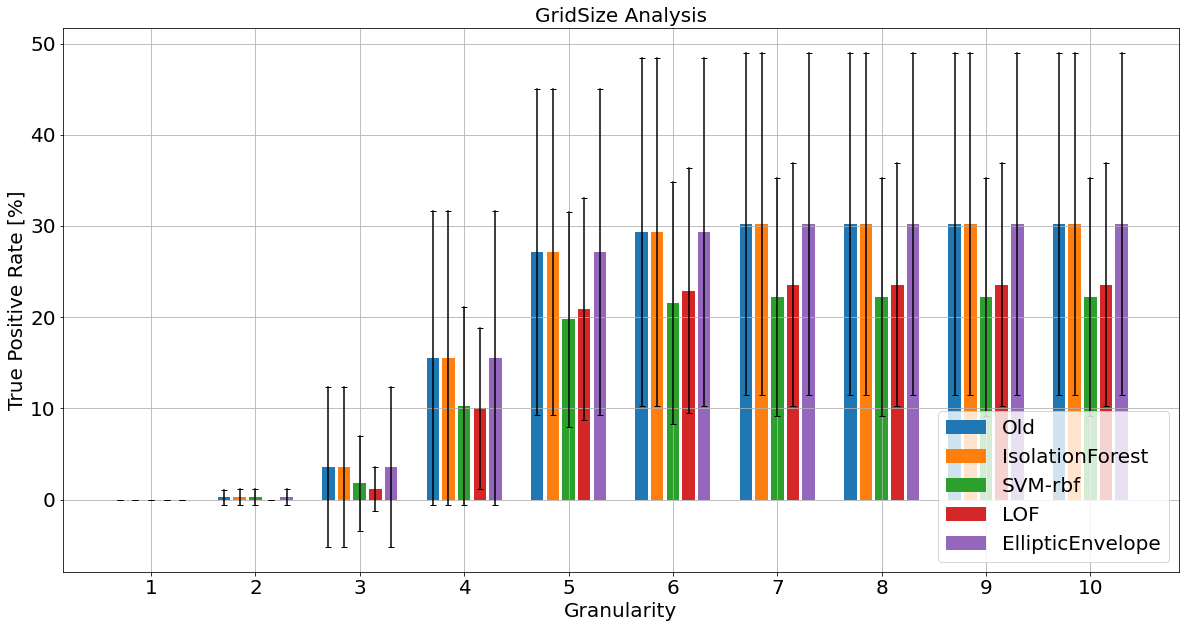

In [41]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax.bar(x+space[i], df[df['Method']==methods[i]]['True_Positive_Rate_Mean'], width=width, color=colors[i], align='center')
    
plt.legend(methods, fontsize=20, loc=4)    

for i in range(len(methods)):
    plt.plot([x+space[i], x+space[i]], [df[df['Method']==methods[i]]['True_Positive_Rate_Mean'] - df[df['Method']==methods[i]]['True_Positive_Rate_Std'],
                            df[df['Method']==methods[i]]['True_Positive_Rate_Mean'] + df[df['Method']==methods[i]]['True_Positive_Rate_Std']], 'k_-')


ax.set_xticks(x)
ax.set_title('GridSize Analysis', fontsize=20)
ax.set_ylabel('True Positive Rate [%]', fontsize=20)
ax.set_xlabel('Granularity', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.grid()

plt.savefig('results/True_Positive_Rate.png', bbox_inches='tight')
plt.show()

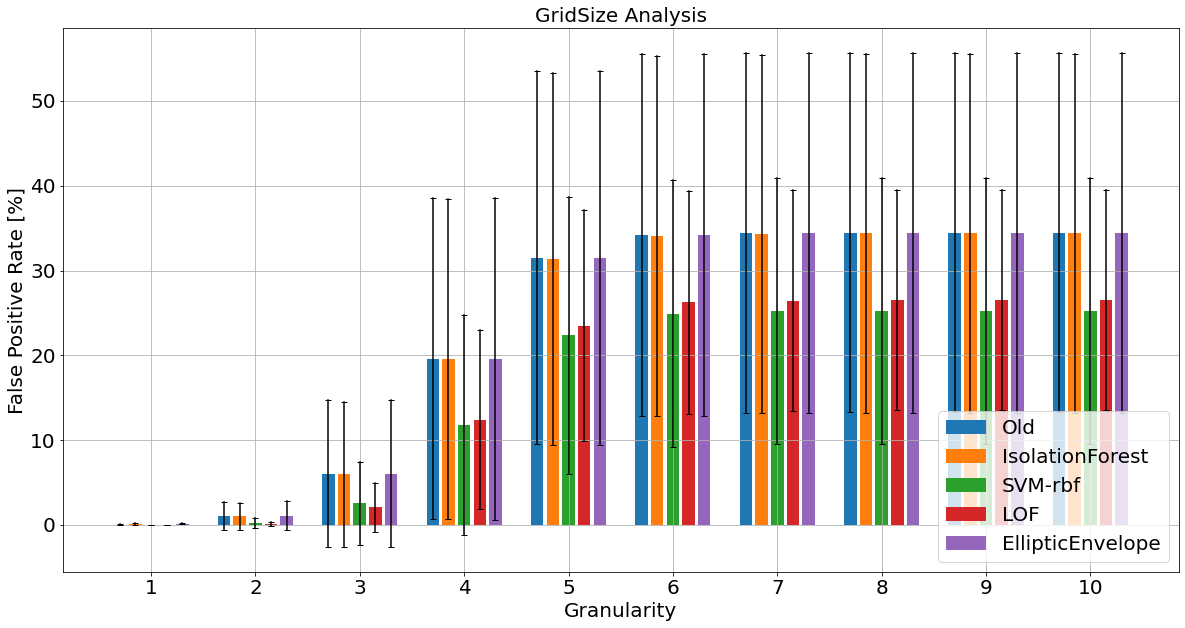

In [42]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax.bar(x+space[i], df[df['Method']==methods[i]]['False_Positive_Rate_Mean'], width=width, color=colors[i], align='center')
    
plt.legend(methods, fontsize=20, loc=4)    

for i in range(len(methods)):
    plt.plot([x+space[i], x+space[i]], [df[df['Method']==methods[i]]['False_Positive_Rate_Mean'] - df[df['Method']==methods[i]]['False_Positive_Rate_Std'],
                            df[df['Method']==methods[i]]['False_Positive_Rate_Mean'] + df[df['Method']==methods[i]]['False_Positive_Rate_Std']], 'k_-')

ax.set_xticks(x)
ax.set_title('GridSize Analysis', fontsize=20)
ax.set_ylabel('False Positive Rate [%]', fontsize=20)
ax.set_xlabel('Granularity', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.grid()

plt.savefig('results/False_Positive_Rate.png', bbox_inches='tight')
plt.show()

# Comparação
Somente para "First_ADP"

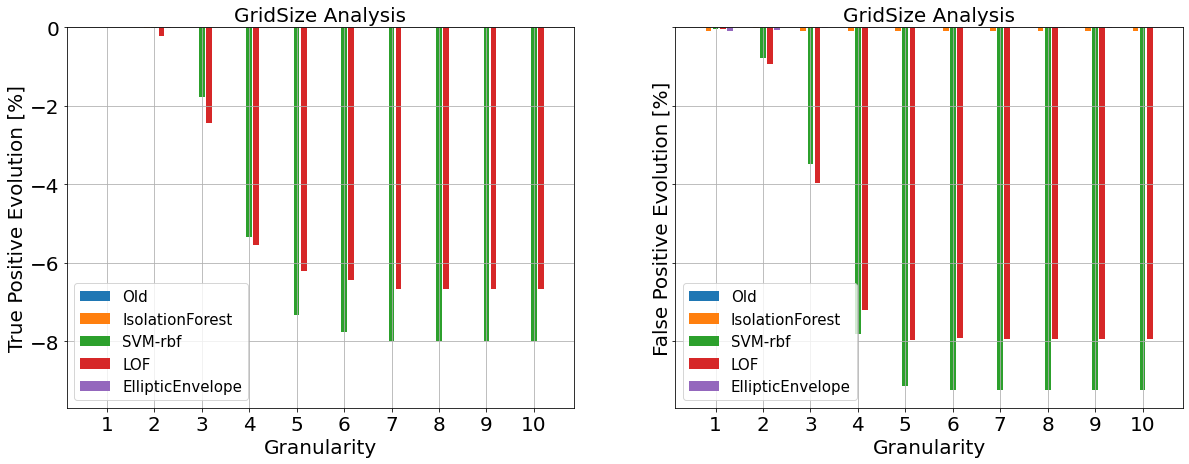

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,7),sharey=True)

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax[0].bar(x+space[i], -df[df['Method']==methods[i]]['True_Positive_Evolution'], width=width, color=colors[i], align='center')

ax[0].legend(methods, fontsize=15, loc=3)
ax[0].set_xticks(x)
ax[0].set_title('GridSize Analysis', fontsize=20)
ax[0].set_ylabel('True Positive Evolution [%]', fontsize=20)
ax[0].set_xlabel('Granularity', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].grid()

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax[1].bar(x+space[i], -df[df['Method']==methods[i]]['False_Positive_Evolution'], width=width, color=colors[i], align='center')

plt.legend(methods, fontsize=15, loc=3)

ax[1].set_xticks(x)
ax[1].set_title('GridSize Analysis', fontsize=20)
ax[1].set_ylabel('False Positive Evolution [%]', fontsize=20)
ax[1].set_xlabel('Granularity', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

plt.grid()

plt.savefig('results/Rates_Evolution.png', bbox_inches='tight')
plt.show()

# plot thiago

In [43]:
df2 = pd.read_csv('Isolation Forest_results_df.csv', index_col=0)

In [45]:
df = df[df['Method']=='Old']
df

,Method,Granularity,True_Positive_Rate_Mean,True_Positive_Rate_Std,False_Positive_Rate_Mean,False_Positive_Rate_Std,True_Positive_Mean,True_Positive_Std,True_Negative_Mean,True_Negative_Std,False_Positive_Mean,False_Positive_Std,False_Negative_Mean,False_Negative_Std,N_Groups_Mean,N_Groups_Std,False_Positive_Evolution,True_Positive_Evolution
0,Old,1,0.000000,0.000000,0.038159,0.077270,0.000000,0.000000,2968.866667,2.294922,1.133333,2.294922,30.000000,0.000000,45.000000,3.909695,0.0,0.0
5,Old,2,0.222222,0.860663,1.028058,1.656927,0.066667,0.258199,2939.466667,49.210723,30.533333,49.210723,29.933333,0.258199,134.666667,13.183684,0.0,0.0
10,Old,3,3.555556,8.771044,6.049383,8.640872,1.066667,2.631313,2790.333333,256.633888,179.666667,256.633888,28.933333,2.631313,369.733333,43.488039,0.0,0.0
15,Old,4,15.555556,16.117951,19.620651,18.944044,4.666667,4.835385,2387.266667,562.638106,582.733333,562.638106,25.333333,4.835385,1012.133333,53.441379,0.0,0.0
20,Old,5,27.111111,17.855979,31.485971,21.993208,8.133333,5.356794,2034.866667,653.198271,935.133333,653.198271,21.866667,5.356794,1802.533333,54.183375,0.0,0.0
25,Old,6,29.333333,19.073792,34.166105,21.332558,8.800000,5.722137,1955.266667,633.576973,1014.733333,633.576973,21.200000,5.722137,2108.000000,30.026179,0.0,0.0
30,Old,7,30.222222,18.749250,34.415264,21.223994,9.066667,5.624775,1947.866667,630.352607,1022.133333,630.352607,20.933333,5.624775,2163.200000,23.616580,0.0,0.0
35,Old,8,30.222222,18.749250,34.464646,21.193193,9.066667,5.624775,1946.400000,629.437822,1023.600000,629.437822,20.933333,5.624775,2169.933333,20.731159,0.0,0.0
40,Old,9,30.222222,18.749250,34.464646,21.193193,9.066667,5.624775,1946.400000,629.437822,1023.600000,629.437822,20.933333,5.624775,2171.466667,20.542175,0.0,0.0
45,Old,10,30.222222,18.749250,34.464646,21.193193,9.066667,5.624775,1946.400000,629.437822,1023.600000,629.437822,20.933333,5.624775,2171.600000,20.635614,0.0,0.0


In [35]:
x = [i for i in range(1,11)]

In [97]:
df2

,Granularity,True_Positive_Rate_Mean,True_Positive_Rate_Std,False_Positive_Rate_Mean,False_Positive_Rate_Std,True_Positive_Mean,True_Positive_Std,True_Negative_Mean,True_Negative_Std,False_Positive_Mean,False_Positive_Std,False_Negative_Mean,False_Negative_Std,Execution_Time_Mean,Execution_Time_Std
0,1.0,0.0,0.0,1.212121,0.0,0.0,0.0,9780.0,0.0,120.0,0.0,100.0,0.0,10.485369,0.0
1,2.0,0.0,0.0,1.777778,0.0,0.0,0.0,9724.0,0.0,176.0,0.0,100.0,0.0,25.732958,0.0
2,3.0,1.0,0.0,3.323232,0.0,1.0,0.0,9571.0,0.0,329.0,0.0,99.0,0.0,73.125301,0.0
3,4.0,8.0,0.0,8.686869,0.0,8.0,0.0,9040.0,0.0,860.0,0.0,92.0,0.0,184.547560,0.0
4,5.0,20.0,0.0,16.151515,0.0,20.0,0.0,8301.0,0.0,1599.0,0.0,80.0,0.0,353.486627,0.0
5,6.0,18.0,0.0,18.787879,0.0,18.0,0.0,8040.0,0.0,1860.0,0.0,82.0,0.0,439.920667,0.0
6,7.0,20.0,0.0,19.272727,0.0,20.0,0.0,7992.0,0.0,1908.0,0.0,80.0,0.0,476.226216,0.0
7,8.0,20.0,0.0,19.333333,0.0,20.0,0.0,7986.0,0.0,1914.0,0.0,80.0,0.0,470.502143,0.0
8,9.0,20.0,0.0,19.333333,0.0,20.0,0.0,7986.0,0.0,1914.0,0.0,80.0,0.0,470.197193,0.0
9,10.0,20.0,0.0,19.343434,0.0,20.0,0.0,7985.0,0.0,1915.0,0.0,80.0,0.0,500.921955,0.0


In [36]:
df['True_Positive_Rate_Mean']

0     0.0
1     0.0
2     1.0
3     8.0
4    20.0
5    18.0
6    20.0
7    20.0
8    20.0
9    20.0
Name: True_Positive_Rate_Mean, dtype: float64

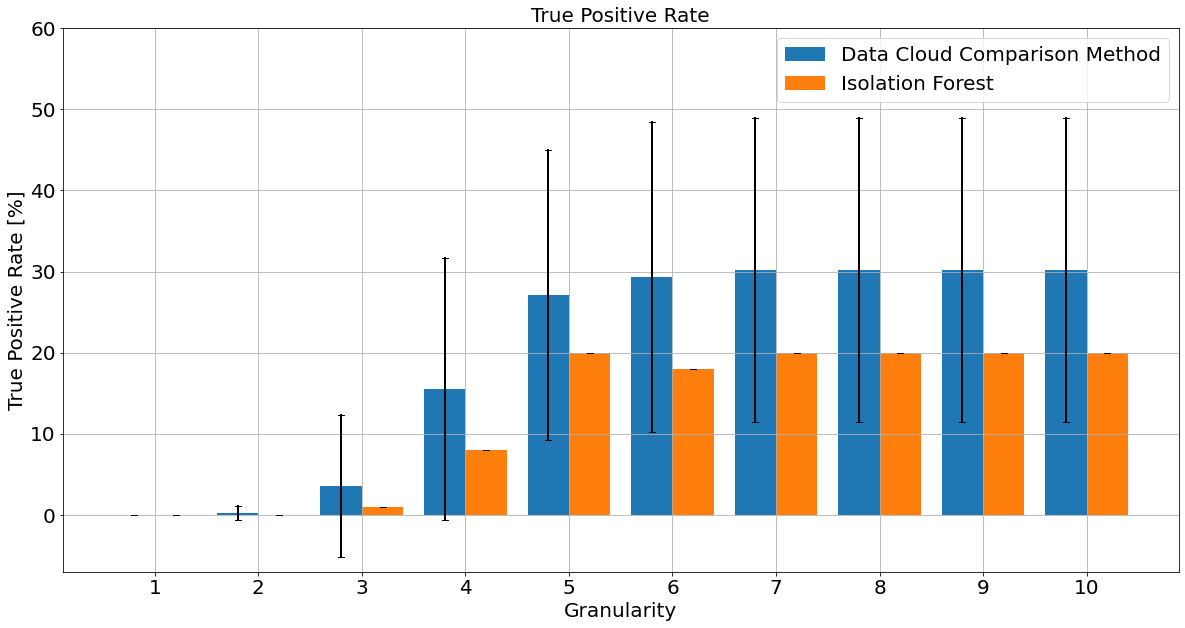

In [61]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

w = 0.4
ax.bar(x-w/2, df['True_Positive_Rate_Mean'], width=w, align='center', label='Data Cloud Comparison Method')
ax.bar(x+w/2, df2['True_Positive_Rate_Mean'], width=w, align='center', label='Isolation Forest')
        
plt.legend(fontsize=20)

for i in range(len(methods)):
    plt.plot([x-w/2, x-w/2], [df['True_Positive_Rate_Mean'] - df['True_Positive_Rate_Std'],
                            df['True_Positive_Rate_Mean'] + df['True_Positive_Rate_Std']], 'k_-')
    plt.plot([x+w/2, x+w/2], [df2['True_Positive_Rate_Mean'] - df2['True_Positive_Rate_Std'],
                            df2['True_Positive_Rate_Mean'] + df2['True_Positive_Rate_Std']], 'k_-')


ax.set_xticks(x)
ax.set_title('True Positive Rate', fontsize=20)
ax.set_ylabel('True Positive Rate [%]', fontsize=20)
ax.set_xlabel('Granularity', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([-7,60])

plt.grid()

plt.savefig('results/True_Positive_Rate.png', bbox_inches='tight')
plt.show()

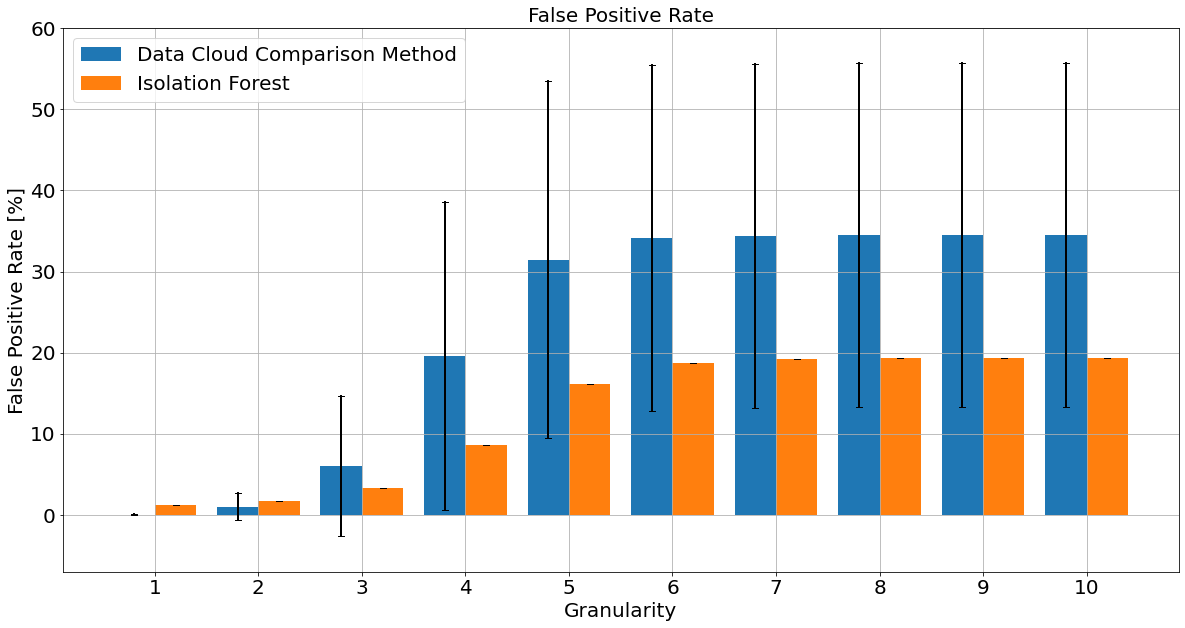

In [62]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

w = 0.4
ax.bar(x-w/2, df['False_Positive_Rate_Mean'], width=w, align='center', label='Data Cloud Comparison Method')
ax.bar(x+w/2, df2['False_Positive_Rate_Mean'], width=w, align='center', label='Isolation Forest')
        
plt.legend(fontsize=20)
for i in range(len(methods)):
    plt.plot([x-w/2, x-w/2], [df['False_Positive_Rate_Mean'] - df['False_Positive_Rate_Std'],
                            df['False_Positive_Rate_Mean'] + df['False_Positive_Rate_Std']], 'k_-')
    plt.plot([x+w/2, x+w/2], [df2['False_Positive_Rate_Mean'] - df2['False_Positive_Rate_Std'],
                            df2['False_Positive_Rate_Mean'] + df2['False_Positive_Rate_Std']], 'k_-')


ax.set_xticks(x)
ax.set_title('False Positive Rate', fontsize=20)
ax.set_ylabel('False Positive Rate [%]', fontsize=20)
ax.set_xlabel('Granularity', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([-7,60])
plt.grid()

plt.savefig('results/False_Positive_Rate.png', bbox_inches='tight')
plt.show()

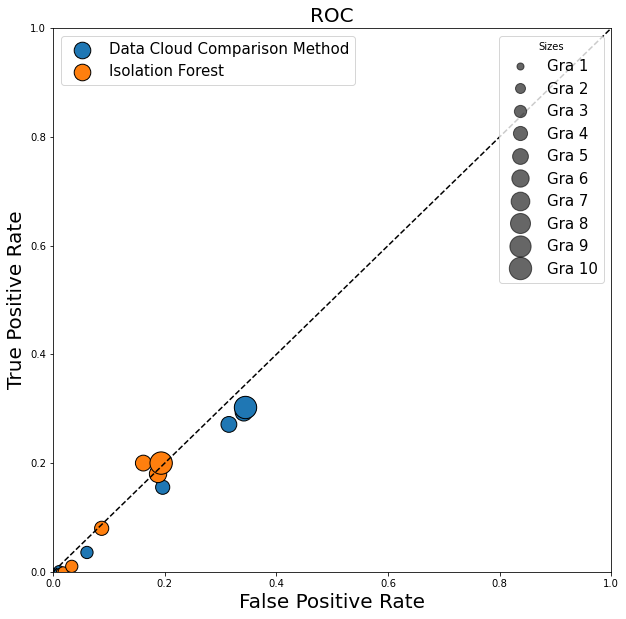

In [96]:
fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(df['False_Positive_Rate_Mean']/100, df['True_Positive_Rate_Mean']/100, 50*x,c='tab:blue', edgecolors='k', label='Data Cloud Comparison Method')
ax.scatter(df2['False_Positive_Rate_Mean']/100, df2['True_Positive_Rate_Mean']/100, 50*x,c='tab:orange', edgecolors='k', label='Isolation Forest')
legend1 = ax.legend(['Data Cloud Comparison Method','Isolation Forest'], fontsize=15)
ax.add_artist(legend1)
'''for i, txt in enumerate(x):
    ax.annotate(txt, (df['False_Positive_Rate_Mean'][i]/100, df['True_Positive_Rate_Mean'][i]/100), fontsize=20)    
    ax.annotate(txt, (df2['False_Positive_Rate_Mean'][i]/100, df2['True_Positive_Rate_Mean'][i]/100), fontsize=20)  '''

ax.set_title('ROC', fontsize=20)
ax.plot([0, 1], [0, 1],'k--')    
ax.set_ylabel('True Positive Rate', fontsize=20)
ax.set_xlabel('False Positive Rate', fontsize=20)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
labels = ['Gra {}'.format(i) for i in x]
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", fontsize=15)

plt.savefig('results/ROC_2.png', bbox_inches='tight')

plt.show()